# Competitive Auto-encoder

## Code

**Repo**:

## Intro

* **Date**: 11/20/2020
* **What**: In this experiment, I'll be building an auto-encoder that uses competitive learning to learn weight prototypes that best represent the data.  This setup differs from the salusa and arrakis progressions because I'm actually not using a hand-crafted winner-takes-all or self-organizing map-like algorithm.  Rather the synapse weights are learned based on how well the network is able to properly reconstruct the output.  The reason why this algorithm is still competitive is because when an input is passed through the neurons, the reconstruction is predicted by taking a weighted sum of each neuron's output predictions.  This forces each neuron to attempt to capture an entire input prototype, rather than just a small recurring piece, as with a collaborative (summed) setup.
* **Why**: This experiment was inspired by [the last experiment](../11_19_2020_experiment_prototype_ae) I did, in which I learned the difference between collaborative and competitive setups.  I think that performing the learning step in terms of the final reconstruction will potentially allow me to find a far better set of prototypes than with the other competitive algos I was studying.  This learning step also doesn't require iterating through all the neurons to see how close each one was to the prototype to inform how each neuron is updated, which is great if I would want to implement this algo on an FPGA in a super-parallelized manner.
* **Hopes**: As previously indicated, I hope this network does a far better job at creating a diverse set of input prototypes than the salusa or arrakis progressions.  As is my hope for all networks I create, I hope that this network does at least as well as [this snn](https://www.frontiersin.org/articles/10.3389/fncom.2015.00099/full), which does a kinda crazy good job learning prototypes but it quite slow in terms of time (takes about 30 min to run ~100,000 images through network).  SNNs are almost inherently limited by the shortest time between spikes, so building a network that does essentially the same thing as SNNs but much more time-efficiently would be a pretty darn good thing.  
* **Limitations**: In [the last experiment](../11_19_2020_experiment_prototype_ae) I did, I saw how collaborative setup allow individual neurons to specialize in reproducing one specific subset of the input image, almost in a "vector component-like" manner.  That's pretty cool because it more or less guarantees that it will only group together highly correlated inputs.  That sort of grouping isn't really evident in a network that's trying to learn full input prototypes.  Obviously the network is trying to find correlated data, but it has to do so on the scale of the entire input, rather than in just some small subset, because these neurons in these networks are ultimately responsible for providing the best estimate of an input if it has the highest output measure.  Thus, competitive prototype-learning networks like this one are presumably less "decoupled" than more collaborative networks, which could be to its detriment in some cases.

In [11]:
import matplotlib.pyplot as plt 
import pickle

In [9]:
!ls

data
Experiment.ipynb
README.md


In [7]:
!mkdir data

In [5]:
!ls ~/rrp/competitive_ae/output_data

data.pickle


In [8]:
!cp ~/rrp/competitive_ae/output_data/data.pickle data/data.pickle

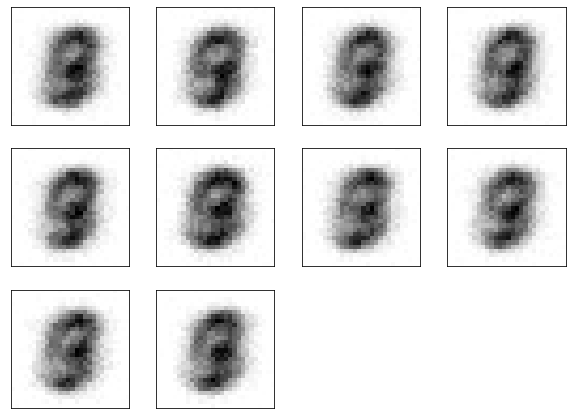

In [90]:
!cp ~/rrp/competitive_ae/output_data/data.pickle data/data.pickle

data = pickle.load(open("data/data.pickle", "rb"))

# print(data)

num_imgs = len(data)

side_len = int(((num_imgs ** 0.5) // 1.0) + 1)


plt.figure(figsize=(10, 10))
for i, img in enumerate(data):
	plt.subplot(side_len, side_len, i + 1)

	plt.grid(False)
	plt.xticks([])
	plt.yticks([])
# 	plt.imshow(img[0], cmap="RdBu", alpha=img[1], vmin=0, vmax=1)
# 	plt.imshow(img, cmap="Greys", vmin=0, vmax=1)
	plt.imshow(img, cmap="Greys")

plt.show()